# Chapter 4: Models

## Linear Regression

Generation of linear-looking data

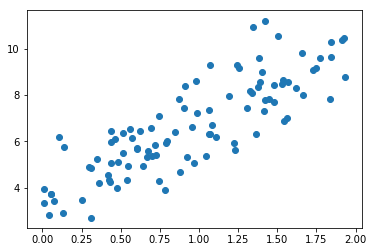

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

X = 2 * np.random.rand(100, 1)
y = 4 + 3*X + np.random.randn(100,1)
plt.scatter(X, y);

Using the normal equation to compute the best theta:

In [2]:
X_b = np.c_[np.ones((100, 1)), X] #add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [3]:
theta_best

array([[ 3.61259363],
       [ 3.22409022]])

Close enough to 4 and 3.

Using the model to make predictions:

In [4]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[  3.61259363],
       [ 10.06077407]])

Plotting predictions:

[0, 2, 0, 15]

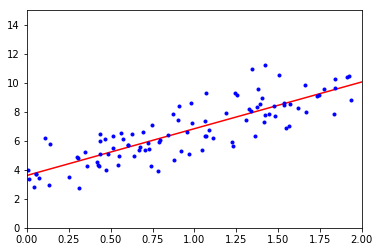

In [5]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0,2,0,15])

Equivalent code using Scikit-Learn:

In [6]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([ 3.61259363]), array([[ 3.22409022]]))

In [7]:
lin_reg.predict(X_new)

array([[  3.61259363],
       [ 10.06077407]])

### Gradient Descent

Using gradient descent to minimize our cost funtion:

In [8]:
eta = .01 #learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [9]:
theta

array([[ 3.59644563],
       [ 3.23879784]])

### Stochastic Gradient Descent

In [10]:
n_epochs = 50
t0, t1 = 5, 50 #learning schedule hyperparameters

def learning_schedule(t):
    return t0/(t+t1)
theta = np.random.randn(2,1) #random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index: random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch*m+i)
        theta = theta - eta * gradients

In [11]:
theta

array([[ 3.58888292],
       [ 3.19139171]])

Using Scikit_Learn:

In [12]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter = 50, penalty = None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=50, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

In [13]:
sgd_reg.intercept_, sgd_reg.coef_

(array([ 3.62009519]), array([ 3.23401487]))

## Polynomial Regression

In [14]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

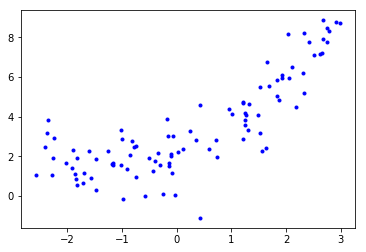

In [15]:
plt.plot(X, y, "b.")

In [16]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias = False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-1.84948781])

In [17]:
X_poly[0]

array([-1.84948781,  3.42060514])

X_poly now contains the original feature of X plus the square of this feature. Now you can fit a LinearRegression model to this extended training data:

In [18]:
lin_reg =LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([ 2.02814146]), array([[ 0.98820773,  0.43793447]]))

[-3, 3, 0, 10]

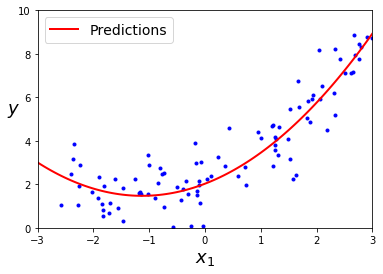

In [19]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])

### Overfitting

Using learning curves to find signs of overfitting:

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth = 3, label='val')
    plt.axis([0,80,0,3])
    plt.legend()

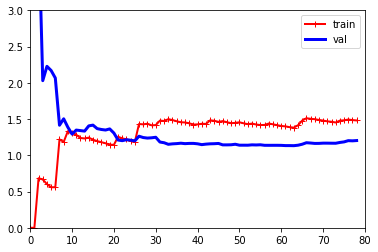

In [21]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y);

These learning curves are typical of an underfitting model. Both curves have reached a plateau; they are close and fairly high. 

Now let's look at the learning curves of a 10th degree polynomial model on the same data:

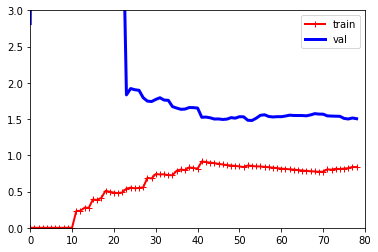

In [22]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline((("poly_features", PolynomialFeatures(degree=10, include_bias=False)), ("sgd_reg", LinearRegression()),))

plot_learning_curves(polynomial_regression, X, y)

Notice how low the error on the training data is compared to the LR model. Also, there is a gap between curves. This means the model performs better on the training data than on the validation data, which is the hallmark of an overfitting model. However if you used a much larger training set, the two curves would continue to get closer. 

## Regularized Linear Models

A good way to reduce overfitting is to regularize the model (to constrain it): the fewer degrees of freedom it has, the harder it will be for it to overfit the data. For a linear model, regularization is typically achieved by constraining the weights of the model. We will now look at Ridge Regression, Lasso Regression, and Elastic Net, which implement three different ways to constrain the weights. 

### Ridge Regression

Ridge Regression with Scikit-Learn using a closed-form solution:

In [23]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[ 4.93170484]])

And using GD:

In [24]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([ 4.30772286])

The penalty hyperparameter sets the type of regularization term to use. Specifying "l2" indicates that you want SGD to add a regularization term to the cost function equal to half the square $$l_2$$ norm of the weight vector: this is simply ridge regression.

### Lasso Regression

In [25]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([ 4.88896573])

### Elastic Net

In [26]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([ 4.88479022])

### Early Stopping

In [27]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline((
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ))

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(n_iter=1, warm_start=True, penalty=None, learning_rate='constant', eta0=0.0005)
minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) #continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [28]:
best_epoch

243

In [29]:
best_model.fit(X, y.ravel())
best_model.predict([[1.5]])

array([ 0.31102557])

*Note*: note that with `warm_start = True`, when the `fit()` method is called, it just continues where training left off instead of restarting from scratch.

## Logistic Regression

Let's use the iris dataset to illustrate logistic regression:

In [30]:
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['DESCR', 'target_names', 'data', 'target', 'feature_names']

In [31]:
X = iris['data'][:, 3:] #petal width
y = (iris['target']==2).astype(np.int) #1 is iris-virginica, else 0

Training the log reg model:

In [32]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Let's look at the model's estimated probabilities for flowers with petal widths varying from 0 to 3 cm:

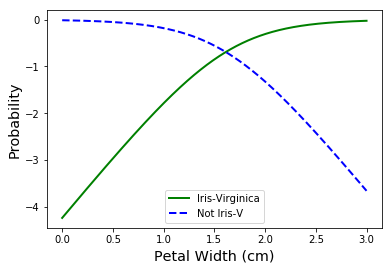

In [33]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_prob = log_reg.predict_log_proba(X_new)
plt.plot(X_new, y_prob[:,1], 'g-', label = 'Iris-Virginica', linewidth = 2)
plt.plot(X_new, y_prob[:,0], 'b--', label = 'Not Iris-V', linewidth = 2)
plt.ylabel('Probability', fontsize = 'x-large')
plt.xlabel('Petal Width (cm)', fontsize = 'x-large')
plt.legend();

### Softmax Regression

We can use softmax regression to classify the iris flowers into all three classes.

In [34]:
X = iris['data'][:,(2,3)] #petal length, petal width
y = iris['target']

softmax_reg = LogisticRegression(multi_class="multinomial", solver='lbfgs', C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

Estimating the type of iris with petal of 5 cm long and 2 cm wide:

In [36]:
softmax_reg.predict([[5,2]])

array([2])

According to our model, such an iris is an Iris-Verginica)

In [37]:
softmax_reg.predict_proba([[5, 2]])

array([[  6.33134076e-07,   5.75276067e-02,   9.42471760e-01]])